In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
col_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment",
    "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
    "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_ra  te", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label","difficulty"
]

In [5]:
dataset_train = pd.read_csv('KDDTrain+.txt',header=None,names=col_names)
dataset_test = pd.read_csv('KDDTest+.txt',header=None,names=col_names)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
dataset_train['label'].value_counts()

label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [8]:
print(dataset_train['dst_host_srv_rerror_rate'].unique())

[0.   0.01 1.   0.16 0.57 0.61 0.68 0.96 0.88 0.84 0.91 0.12 0.79 0.02
 0.04 0.29 0.03 0.99 0.97 0.07 0.75 0.2  0.44 0.08 0.06 0.81 0.32 0.55
 0.33 0.5  0.05 0.15 0.45 0.66 0.93 0.89 0.62 0.67 0.27 0.41 0.98 0.71
 0.38 0.74 0.19 0.39 0.11 0.92 0.7  0.72 0.73 0.9  0.17 0.53 0.87 0.69
 0.77 0.78 0.52 0.35 0.34 0.13 0.28 0.95 0.47 0.31 0.86 0.65 0.82 0.94
 0.64 0.26 0.14 0.6  0.22 0.4  0.1  0.25 0.09 0.18 0.54 0.21 0.59 0.85
 0.8  0.37 0.49 0.56 0.76 0.51 0.24 0.48 0.83 0.36 0.58 0.3  0.42 0.63
 0.43 0.46 0.23]


In [9]:
print(dataset_train.columns)
print(dataset_train.head())

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_ra  te', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'difficulty'],
      dtype='object')
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          

In [32]:
#variables categorielles identifiees dans le Train set 
print("Training set")
for col_name in dataset_train.columns:
    if dataset_train[col_name].dtypes=='object' :
        unique_cat=len(dataset_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories ".format(col_name=col_name,unique_cat=unique_cat))
print()
print('Distribution of categories in services')
print(dataset_train['service'].value_counts().sort_values(ascending=False).head())

print()
print('Test set')
for col_name in dataset_test.columns:
    if dataset_test[col_name].dtypes == 'object' :
        unique_cat = len(dataset_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories ".format(col_name=col_name,unique_cat=unique_cat))


Training set
Feature 'label' has 23 categories 

Distribution of categories in services
service
24    40338
49    21853
12     9043
54     7313
20     6860
Name: count, dtype: int64

Test set
Feature 'label' has 38 categories 


In [33]:
print(dataset_train.isnull().sum())

duration                         0
protocol_type                    0
service                          0
flag                             0
src_bytes                        0
dst_bytes                        0
land                             0
wrong_fragment                   0
urgent                           0
hot                              0
num_failed_logins                0
logged_in                        0
num_compromised                  0
root_shell                       0
su_attempted                     0
num_root                         0
num_file_creations               0
num_shells                       0
num_access_files                 0
num_outbound_cmds                0
is_host_login                    0
is_guest_login                   0
count                            0
srv_count                        0
serror_rate                      0
srv_serror_rate                  0
rerror_rate                      0
srv_rerror_rate                  0
same_srv_rate       

In [34]:
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    le = LabelEncoder()
    # Apprentissage sur le train
    dataset_train[col] = le.fit_transform(dataset_train[col])
    # Création du mapping
    label_map = {label: idx for idx, label in enumerate(le.classes_)}
    # Encodage du test, valeurs inconnues = -1
    dataset_test[col] = dataset_test[col].map(label_map).fillna(-1).astype(int)

In [18]:
print(dataset_train[['protocol_type', 'service', 'flag']].head())

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [19]:
dataset_train['is_attack'] = dataset_train['label'].apply(lambda x: 0 if x == 'normal' else 1)
dataset_test['is_attack'] = dataset_test['label'].apply(lambda x: 0 if x == 'normal' else 1)

In [20]:
print(dataset_train[['is_attack']].head())

   is_attack
0          0
1          0
2          1
3          0
4          0


In [21]:
# ...existing code...
X_train = dataset_train.drop(['is_attack', 'label'], axis=1)
y_train = dataset_train['is_attack']
X_test = dataset_test.drop(['is_attack', 'label'], axis=1)
y_test = dataset_test['is_attack']
# ...existing code...

In [22]:
y_train = dataset_train['is_attack']
y_test = dataset_test['is_attack']


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param_grid ={
    'n_estimators':[50,100,150],
    'max_depth':[None,10,20],
    'min_samples_leaf':[1,2,4],
}
rf_model = RandomForestClassifier()
# Entraînement du modèle binaire
model = RandomizedSearchCV(rf_model,param_distributions=param_grid,n_iter=10)
model.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'n_estimators': [50, 100, ...]}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [28]:
print('Best hyperparametres ', model.best_params_)
print('Best Score ', model.best_score_)

# Prédiction du modele et évaluation de la matrice
y_pred = model.predict(X_test)
accurancy= model.score(X_test,y_test)

print('Model accurancy',accurancy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Best hyperparametres  {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 20}
Best Score  0.9996824738461765
Model accurancy 0.8148953158268275
              precision    recall  f1-score   support

           0       0.71      0.97      0.82      9711
           1       0.97      0.70      0.81     12833

    accuracy                           0.81     22544
   macro avg       0.84      0.83      0.81     22544
weighted avg       0.86      0.81      0.81     22544

[[9445  266]
 [3907 8926]]


In [29]:
import joblib

joblib.dump(model, "ids_model.pkl")
print("✅ Modèle sauvegardé sous 'ids_model.pkl'")

✅ Modèle sauvegardé sous 'ids_model.pkl'


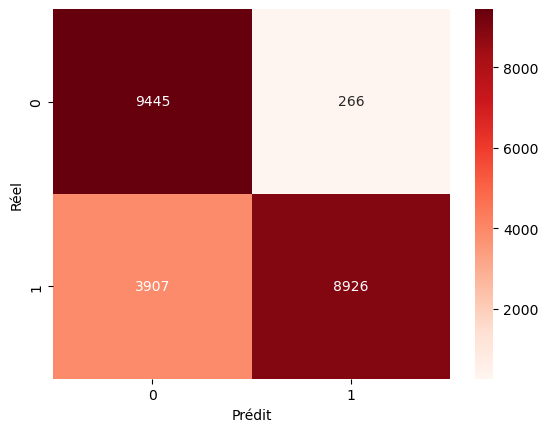

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [34]:
importances = model.feature_importances_
features = X_train.columns
sorted_idx = importances.argsort()[::-1]
for idx in sorted_idx[:10]:
    print(f"{features[idx]}: {importances[idx]:.3f}")

src_bytes: 0.154
dst_bytes: 0.094
same_srv_rate: 0.091
diff_srv_rate: 0.073
difficulty: 0.070
dst_host_same_srv_rate: 0.056
flag: 0.055
logged_in: 0.049
dst_host_srv_count: 0.036
protocol_type: 0.035


In [35]:
# Afficher tous les protocoles présents dans le dataset
print("Protocoles présents dans le dataset :")
print(dataset_train['protocol_type'].value_counts())

Protocoles présents dans le dataset :
protocol_type
1    102689
2     14993
0      8291
Name: count, dtype: int64


In [36]:
# Afficher tous les services présents dans le dataset
print("\nServices présents dans le dataset :")
print(dataset_train['service'].value_counts())


Services présents dans le dataset :
service
24    40338
49    21853
12     9043
54     7313
20     6860
      ...  
61        3
27        2
3         2
22        2
25        1
Name: count, Length: 70, dtype: int64
